In [1]:
import re

import requests
from bs4 import BeautifulSoup

# the source urls
url = "https://en.wikipedia.org/wiki/2024_Summer_Olympics"

# Send a request to the website and get the HTML content
response = requests.get(url)
html_content = response.content

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")


In [21]:
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of 2024 Summer Olympics medal winners - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pin

This code block will output the name and the reference Wikipedia url belonging to this year’s Olympic Games for all summer Olympic sports

In [2]:
is_sport = False
sports_urls = {}

for res in soup.find_all("a", href=True):

    res_text = str(res)
    if "Artistic swimming" in res_text:
        is_sport = True

    if is_sport:
        url = "https://en.wikipedia.org/" + res["href"]
        print(res.text, " -- ", url)
        sports_urls[res.text] = url

    if "Wrestling" in res_text:
        break


Artistic swimming  --  https://en.wikipedia.org//wiki/Artistic_swimming_at_the_2024_Summer_Olympics
Diving  --  https://en.wikipedia.org//wiki/Diving_at_the_2024_Summer_Olympics
Marathon swimming  --  https://en.wikipedia.org//wiki/Marathon_swimming_at_the_2024_Summer_Olympics
Swimming  --  https://en.wikipedia.org//wiki/Swimming_at_the_2024_Summer_Olympics
Water polo  --  https://en.wikipedia.org//wiki/Water_polo_at_the_2024_Summer_Olympics
Archery  --  https://en.wikipedia.org//wiki/Archery_at_the_2024_Summer_Olympics
Athletics  --  https://en.wikipedia.org//wiki/Athletics_at_the_2024_Summer_Olympics
Badminton  --  https://en.wikipedia.org//wiki/Badminton_at_the_2024_Summer_Olympics
Basketball  --  https://en.wikipedia.org//wiki/Basketball_at_the_2024_Summer_Olympics
3×3 basketball  --  https://en.wikipedia.org//wiki/3x3_basketball
Boxing  --  https://en.wikipedia.org//wiki/Boxing_at_the_2024_Summer_Olympics
Canoeing  --  https://en.wikipedia.org//wiki/Canoeing_at_the_2024_Summer_Oly

Use the mwviews library, which provides a flexible API to download view count information of Wikipedia sites on various time scales and resolutions

In [4]:
import pandas as pd
from mwviews.api import PageviewsClient

p = PageviewsClient(user_agent="j.milan.91@gmail.com> Sport analysis")
domain = "en"

# download the data
sports_data = {}
sports_count = {}

for sport, url in sports_urls.items():

    page = url.split("wiki/")[-1]
    data = []
    for a, b in p.article_views(
        domain + ".wikipedia", [page], granularity="daily", start="20240611", end="20240811"
    ).items():
        data.append({"date": a, "count": b[page]})

    df = pd.DataFrame(data)
    print(sport, " -- ", sum(df["count"]))
    df["page"] = page
    sports_data[sport] = df
    sports_count[sport] = sum(df["count"])


Artistic swimming  --  267185
Diving  --  320767
Marathon swimming  --  42342
Swimming  --  1069417
Water polo  --  325466
Archery  --  511652
Athletics  --  1518492
Badminton  --  928358
Basketball  --  1448499
3×3 basketball  --  150463
Boxing  --  636231
Canoeing  --  297376
Cycling  --  500281
Equestrian  --  98130
Fencing  --  378787
Field hockey  --  613544
Football  --  1703944
Golf  --  263324
Gymnastics  --  988803
Handball  --  415937
Judo  --  512381
Modern pentathlon  --  204901
Rowing  --  276970
Rugby sevens  --  420839
Sailing  --  291396
Shooting  --  469699
Table tennis  --  568349
Taekwondo  --  298561
Tennis  --  1015154
Triathlon  --  162600
Volleyball  --  948688
Weightlifting  --  416122
Wrestling  --  734205


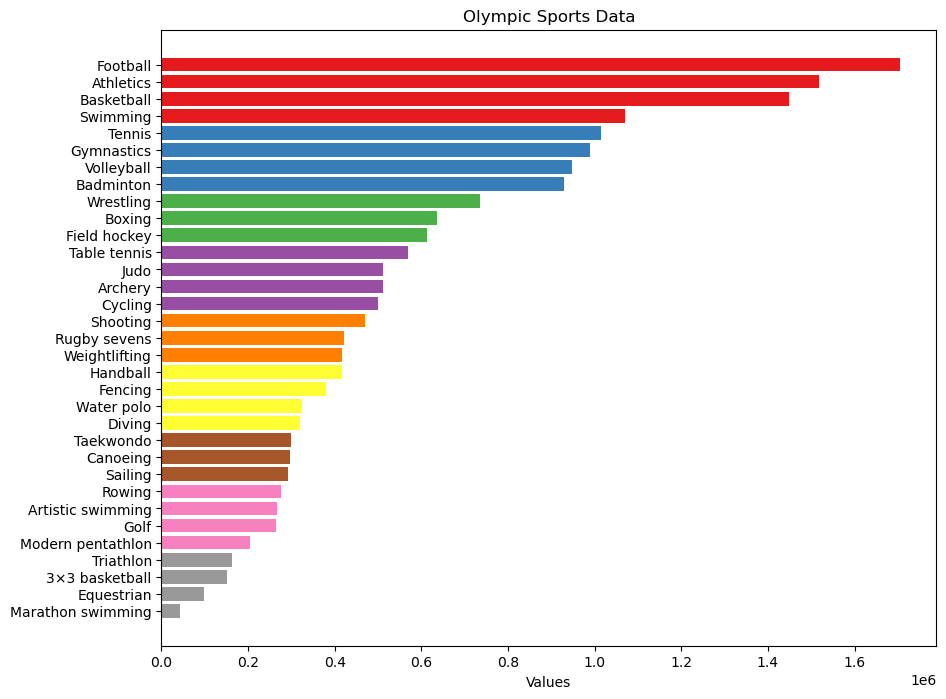

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Sorting the data by values in descending order
sorted_sports_data = dict(sorted(sports_count.items(), key=lambda item: item[1], reverse=True))

# Extracting the keys and values
sports = list(sorted_sports_data.keys())
values = list(sorted_sports_data.values())

# Creating the bar chart
fig, ax = plt.subplots(figsize=(10, 8))
colors = plt.cm.Set1(np.linspace(0, 1, len(sports)))  # Using a colormap appropriate for Olympics colors

bars = ax.barh(sports, values, color=colors)
ax.set_xlabel("Values")
ax.set_title("Olympic Sports Data")

# Inverting the y-axis to show the highest value on top
ax.invert_yaxis()

plt.show()


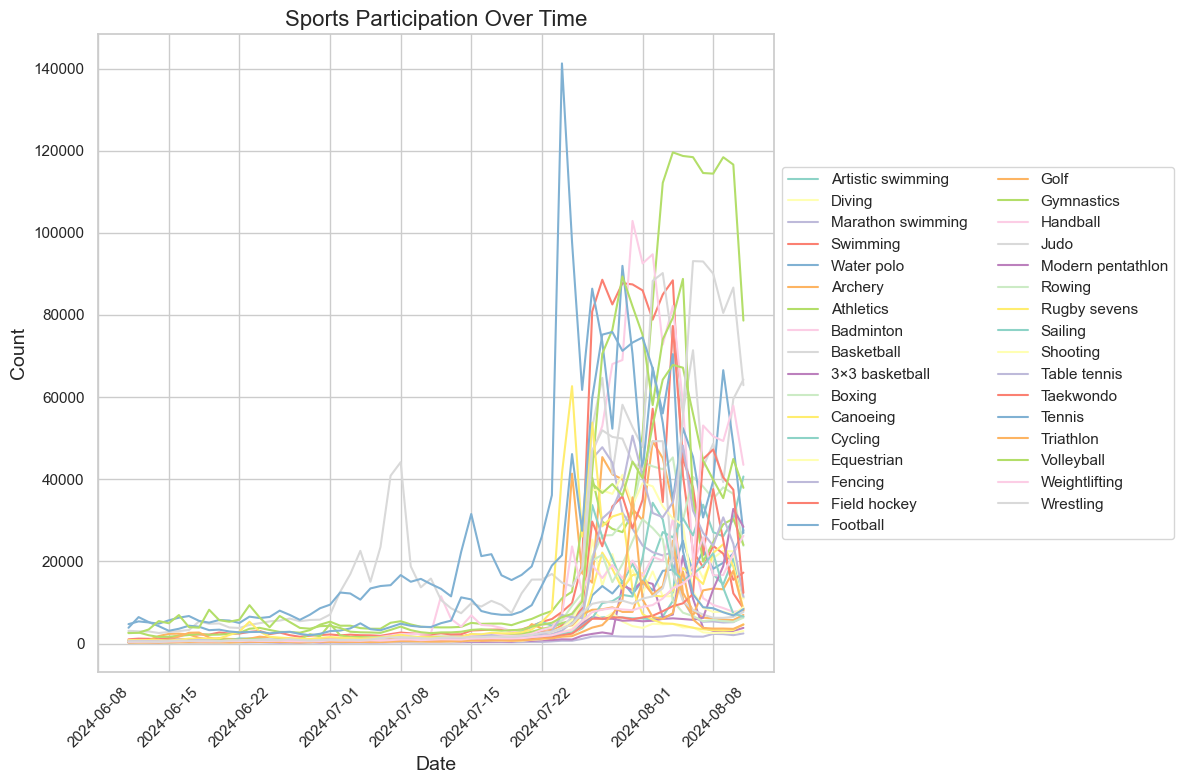

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns


# Use seaborn style for better aesthetics
sns.set(style='whitegrid')

# Create a larger figure for better readability
f, ax = plt.subplots(1, 1, figsize=(12, 8))

# Use a colormap for the Olympic Games
olympic_colors = sns.color_palette("Set3", n_colors=len(sports_data))

# Plot each sport with a corresponding color from the colormap
for (sport, data), color in zip(sports_data.items(), olympic_colors):
    ax.plot(data['date'], data['count'], label=sport, color=color)

# Adjust the legend to avoid overlapping with the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)

# Set plot titles and labels
ax.set_title('Sports Participation Over Time', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

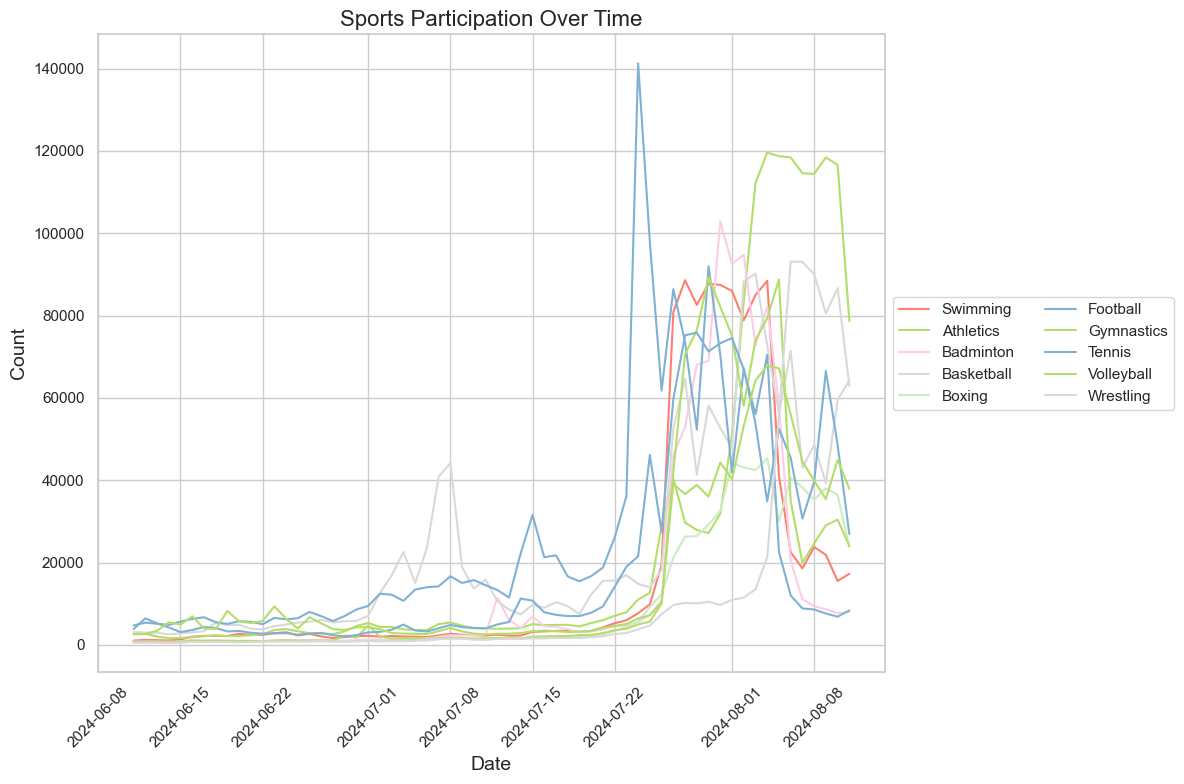

In [15]:
df_sport_ranking = pd.DataFrame(sports_count.items(), columns=["sport", "Wiki view count"]).sort_values(
    by="Wiki view count", ascending=False
)
top10 = set(df_sport_ranking.head(10).sport)

sns.set(style="whitegrid")

f, ax = plt.subplots(1, 1, figsize=(12, 8))

# Use a colormap for the Olympic Games
olympic_colors = sns.color_palette("Set3", n_colors=len(sports_data))

# Plot each sport with a corresponding color from the colormap
for (sport, data), color in zip(sports_data.items(), olympic_colors):
    if sport in top10:
        ax.plot(data["date"], data["count"], label=sport, color=color)

# Adjust the legend to avoid overlapping with the plot
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=2)

# Set plot titles and labels
ax.set_title("Sports Participation Over Time", fontsize=16)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()


### Medal winners

In [16]:
medal_url = "https://en.wikipedia.org/wiki/List_of_2024_Summer_Olympics_medal_winners"

response = requests.get(medal_url)
html_content = response.content
soup = BeautifulSoup(html_content, "html.parser")


In [17]:
def get_url(text):
    soup_text = BeautifulSoup(str(text), "html.parser")
    athlete_links = soup_text.find_all("a", href=True)
    athlete_links = [a for a in athlete_links if "2024" not in str(a)]
    return athlete_links


def contains_numbers(string):
    return bool(re.search(r"\d", string))


def add_medalists(medal_list, medal_html):
    for athlete_link in get_url(medal_html):
        medal_list.append((athlete_link.text, "https://en.wikipedia.org/" + athlete_link["href"]))


url = "https://en.wikipedia.org/wiki/List_of_2024_Summer_Olympics_medal_winners"

# Send a request to the webpage
response = requests.get(url)
html_content = response.content

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Find all the tables with medal winners
tables = soup.find_all("table", class_="wikitable")

# Initialize lists to hold names and URLs of gold medal winners
golds = []
silvers = []
bronzes = []

# Iterate over each table to find gold medal winners
for idx, table in enumerate(tables):

    rows = table.find_all("tr")
    data = []
    for row in rows:
        cells = row.find_all("td")

        if len(cells) == 4:
            event, gold, silver, bronze = cells
            add_medalists(golds, gold)
            add_medalists(silvers, silver)
            add_medalists(bronzes, bronze)

        if len(cells) == 7:
            gold, silver, bronze = [c for c in cells][1::2]
            add_medalists(golds, gold)
            add_medalists(silvers, silver)
            add_medalists(bronzes, bronze)

        if len(cells) == 6:
            print([c.text for c in cells])


for athlete_link in get_url(gold):
    golds.append((athlete_link.text, "https://en.wikipedia.org/" + athlete_link["href"]))

for athlete_link in get_url(silver):
    silvers.append((athlete_link.text, "https://en.wikipedia.org/" + athlete_link["href"]))

for athlete_link in get_url(bronze):
    bronzes.append((athlete_link.text, "https://en.wikipedia.org/" + athlete_link["href"]))


['100 m breaststrokedetails\n', 'Nicolò Martinenghi\xa0Italy', '59.03\n', 'Adam Peaty\xa0Great BritainNic Fink\xa0United States', '59.05\n', 'Not awardedas there was a tie for silver.\n']


In [18]:
# Total number of medal-winners
print("Number of gold medalists: ", len(golds))
print("Number of silver medalists: ", len(silvers))
print("Number of bronze medalists: ", len(bronzes))
print()

# Double-checking the 3 golds and 1 silver of Biles
print("Golds:")
for name, link in golds:
    if "Simone B" in name:
        print(link)

print("Silvers:")
for name, link in silvers:
    if "Simone B" in name:
        print(link)


Number of gold medalists:  756
Number of silver medalists:  762
Number of bronze medalists:  751

Golds:
https://en.wikipedia.org//wiki/Simone_Biles
https://en.wikipedia.org//wiki/Simone_Biles
https://en.wikipedia.org//wiki/Simone_Biles
Silvers:
https://en.wikipedia.org//wiki/Simone_Biles


In [19]:
athletes_links = {}

for athlete, link in golds:
    athletes_links[athlete] = link
for athlete, link in silvers:
    athletes_links[athlete] = link
for athlete, link in bronzes:
    athletes_links[athlete] = link

print()
print("Number of medal winning atheltes: ", len(athletes_links))
print()



Number of medal winning atheltes:  1956



In [20]:
atheletes_data = {}
atheletes_count = {}

for idx, (athlete, url) in enumerate(athletes_links.items()):

    if idx % 100 == 0:
        print(idx)

    try:

        page = url.split("wiki/")[-1]
        data = []
        for a, b in p.article_views(
            domain + ".wikipedia", [page], granularity="daily", start="20240611", end="20240811"
        ).items():
            data.append({"date": a, "count": b[page]})

        df = pd.DataFrame(data)
        # print(athlete, ' -- ', sum(df['count']))
        df["page"] = page
        atheletes_count[sport] = df
        atheletes_data[sport] = sum(df["count"])

    except:
        pass

print("Number of medal-winning athletes with measurable Wiki popularity: ", len(atheletes_data))


0
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/https%3A%2F%2Fen.wikipedia.org%2F%23endnote_bb/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/https%3A%2F%2Fen.wikipedia.org%2F%23endnote_bb/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Jordan_D%25C3%25ADaz_%28triple_jumper%29/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Jordan_D%25C3%25ADaz_%28triple_jumper%29/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Sha%2527Carri_Richardson/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Sha%2527Carri_Richardson/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/%25C3%2581lvaro_Mart%25C3%25ADn_%28racewalker%29/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Mar%25C3%25ADa_P%25C3%25A9rez_%28racewalker%29/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/%25C3%2581lvaro_Mart%25C3%25ADn_%28racewalker%29/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Mar%25C3%25ADa_P%25C3%25A9rez_%28racewalker%29/daily/2024061100/2024081100']


100
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/A%2527ja_Wilson/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/A%2527ja_Wilson/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Erislandy_%25C3%2581lvarez/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Erislandy_%25C3%2581lvarez/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Josef_Dost%25C3%25A1l_%28canoeist%29/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Josef_Dost%25C3%25A1l_%28canoeist%29/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Katie_Vincent_%28canoeist%29/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Katie_Vincent_%28canoeist%29/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/I%25C3%25BAri_Leit%25C3%25A3o/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/I%25C3%25BAri_Leit%25C3%25A3o/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Kelland_O%2527Brien/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Kelland_O%2527Brien/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Chlo%25C3%25A9_Dygert/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Chlo%25C3%25A9_Dygert/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Pauline_Ferrand-Pr%25C3%25A9vot/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Pauline_Ferrand-Pr%25C3%25A9vot/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Jos%25C3%25A9_Torres_%28Argentine_cyclist%29/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Jos%25C3%25A9_Torres_%28Argentine_cyclist%29/daily/2024061100/2024081100']


200
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/M%25C3%25A1t%25C3%25A9_Tam%25C3%25A1s_Koch/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Tibor_Andr%25C3%25A1sfi/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/M%25C3%25A1t%25C3%25A9_Tam%25C3%25A1s_Koch/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Tibor_Andr%25C3%25A1sfi/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Gergely_Sikl%25C3%25B3si/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/D%25C3%25A1vid_Nagy_%28fencer%29/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Gergely_Sikl%25C3%25B3si/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/D%25C3%25A1vid_Nagy_%28fencer%29/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ren%25C3%25A9e_van_Laarhoven/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ren%25C3%25A9e_van_Laarhoven/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Fr%25C3%25A9d%25C3%25A9rique_Matla/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Fr%25C3%25A9d%25C3%25A9rique_Matla/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/%25C3%2581lex_Baena/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/%25C3%2581lex_Baena/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Adri%25C3%25A1n_Bernab%25C3%25A9/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Adri%25C3%25A1n_Bernab%25C3%25A9/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Pau_Cubars%25C3%25AD/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Eric_Garc%25C3%25ADa_%28footballer%2C_born_2001%29/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Pau_Cubars%25C3%25AD/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Eric_Garc%25C3%25ADa_%28footballer%2C_born_2001%29/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Joan_Garc%25C3%25ADa/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Sergio_G%25C3%25B3mez_%28footballer%2C_born_2000%29/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Joan_Garc%25C3%25ADa/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Sergio_G%25C3%25B3mez_%28footballer%2C_born_2000%29/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Miguel_Guti%25C3%25A9rrez_%28footballer%2C_born_2001%29/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Miguel_Guti%25C3%25A9rrez_%28footballer%2C_born_2001%29/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Diego_L%25C3%25B3pez_%28footballer%2C_born_May_2002%29/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ferm%25C3%25ADn_L%25C3%25B3pez/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Diego_L%25C3%25B3pez_%28footballer%2C_born_May_2002%29/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ferm%25C3%25ADn_L%25C3%25B3pez/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Juanlu_S%25C3%25A1nchez/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Juanlu_S%25C3%25A1nchez/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Be%25C3%25B1at_Turrientes/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Be%25C3%25B1at_Turrientes/daily/2024061100/2024081100']


300
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Alice_D%2527Amato/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Alice_D%2527Amato/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Niclas_Kirkel%25C3%25B8kke/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Niclas_Kirkel%25C3%25B8kke/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Henrik_M%25C3%25B8llgaard/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Henrik_M%25C3%25B8llgaard/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Lukas_J%25C3%25B8rgensen/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Lukas_J%25C3%25B8rgensen/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Nora_M%25C3%25B8rk/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Nora_M%25C3%25B8rk/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Silje_Solberg-%25C3%2598sthassel/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Silje_Solberg-%25C3%2598sthassel/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Kristine_Breist%25C3%25B8l/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Kristine_Breist%25C3%25B8l/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Marit_R%25C3%25B8sberg_Jacobsen/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Marit_R%25C3%25B8sberg_Jacobsen/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Andreja_Le%25C5%25A1ki/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Barbara_Mati%25C4%2587/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Andreja_Le%25C5%25A1ki/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Barbara_Mati%25C4%2587/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Sarah-L%25C3%25A9onie_Cysique/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Sarah-L%25C3%25A9onie_Cysique/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Marie-%25C3%2588ve_Gahi%25C3%25A9/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Maxime-Ga%25C3%25ABl_Ngayap_Hambou/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Marie-%25C3%2588ve_Gahi%25C3%25A9/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Maxime-Ga%25C3%25ABl_Ngayap_Hambou/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Aur%25C3%25A9lien_Diesse/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Aur%25C3%25A9lien_Diesse/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Michelle_Guly%25C3%25A1s/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Michelle_Guly%25C3%25A1s/daily/2024061100/2024081100']


400
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Martin_Sinkovi%25C4%2587/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Valent_Sinkovi%25C4%2587/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Martin_Sinkovi%25C4%2587/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Valent_Sinkovi%25C4%2587/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Paul_O%2527Donovan/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Paul_O%2527Donovan/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Amalia_Bere%25C8%2599/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Amalia_Bere%25C8%2599/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ioana_Vr%25C3%25AEnceanu/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Simona_Radi%25C8%2599/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ioana_Vr%25C3%25AEnceanu/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Simona_Radi%25C8%2599/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Victoria-%25C8%2598tefania_Petreanu/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Victoria-%25C8%2598tefania_Petreanu/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Th%25C3%25A9o_Forner/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Th%25C3%25A9o_Forner/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Diego_Bot%25C3%25ADn/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Flori%25C3%25A1n_Trittel/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Diego_Bot%25C3%25ADn/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Flori%25C3%25A1n_Trittel/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Lukas_M%25C3%25A4hr/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Lukas_M%25C3%25A4hr/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Zorana_Arunovi%25C4%2587/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Zorana_Arunovi%25C4%2587/daily/2024061100/2024081100']


500
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Aleksandra_Miros%25C5%2582aw/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Aleksandra_Miros%25C5%2582aw/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Lukas_M%25C3%25A4rtens/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Lukas_M%25C3%25A4rtens/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Hubert_K%25C3%25B3s/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Hubert_K%25C3%25B3s/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Krist%25C3%25B3f_Mil%25C3%25A1k/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Krist%25C3%25B3f_Mil%25C3%25A1k/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Krist%25C3%25B3f_Rasovszky/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Sarah_Sj%25C3%25B6str%25C3%25B6m/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Krist%25C3%25B3f_Rasovszky/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Sarah_Sj%25C3%25B6str%25C3%25B6m/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Mollie_O%2527Callaghan/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Mollie_O%2527Callaghan/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Viviana_M%25C3%25A1rton/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Alth%25C3%25A9a_Laurin/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Viviana_M%25C3%25A1rton/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Alth%25C3%25A9a_Laurin/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Kate%25C5%2599ina_Siniakov%25C3%25A1/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Tom%25C3%25A1%25C5%25A1_Mach%25C3%25A1%25C4%258D/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Kate%25C5%2599ina_Siniakov%25C3%25A1/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Tom%25C3%25A1%25C5%25A1_Mach%25C3%25A1%25C4%258D/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Lasse_L%25C3%25BChrs/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Lasse_L%25C3%25BChrs/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/David_%25C3%2585hman/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/David_%25C3%2585hman/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ana_Patr%25C3%25ADcia/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ana_Patr%25C3%25ADcia/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Barth%25C3%25A9l%25C3%25A9my_Chinenyeze/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Barth%25C3%25A9l%25C3%25A9my_Chinenyeze/daily/2024061100/2024081100']


600
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/K%25C3%25A9vin_Tillie/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Earvin_N%2527Gapeth/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/K%25C3%25A9vin_Tillie/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Earvin_N%2527Gapeth/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Tr%25C3%25A9vor_Cl%25C3%25A9venot/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Tr%25C3%25A9vor_Cl%25C3%25A9venot/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Th%25C3%25A9o_Faure/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Th%25C3%25A9o_Faure/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Radoslav_Filipovi%25C4%2587/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Du%25C5%25A1an_Mandi%25C4%2587/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Radoslav_Filipovi%25C4%2587/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Du%25C5%25A1an_Mandi%25C4%2587/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Strahinja_Ra%25C5%25A1ovi%25C4%2587/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Sava_Ran%25C4%2591elovi%25C4%2587/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Strahinja_Ra%25C5%25A1ovi%25C4%2587/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Sava_Ran%25C4%2591elovi%25C4%2587/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Milo%25C5%25A1_%25C4%2586uk/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Milo%25C5%25A1_%25C4%2586uk/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Nikola_Dedovi%25C4%2587/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Nikola_Dedovi%25C4%2587/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Radomir_Dra%25C5%25A1ovi%25C4%2587/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Radomir_Dra%25C5%25A1ovi%25C4%2587/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Nikola_Jak%25C5%25A1i%25C4%2587/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Nemanja_Ubovi%25C4%2587/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Nikola_Jak%25C5%25A1i%25C4%2587/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Nemanja_Ubovi%25C4%2587/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Petar_Jak%25C5%25A1i%25C4%2587/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Viktor_Ra%25C5%25A1ovi%25C4%2587/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Petar_Jak%25C5%25A1i%25C4%2587/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Viktor_Ra%25C5%25A1ovi%25C4%2587/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Vladimir_Mi%25C5%25A1ovi%25C4%2587/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Vladimir_Mi%25C5%25A1ovi%25C4%2587/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Paula_Cresp%25C3%25AD/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Paula_Cresp%25C3%25AD/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Maica_Garc%25C3%25ADa_Godoy/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Paula_Leit%25C3%25B3n/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Maica_Garc%25C3%25ADa_Godoy/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Paula_Leit%25C3%25B3n/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Pili_Pe%25C3%25B1a/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Nona_P%25C3%25A9rez/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Pili_Pe%25C3%25B1a/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Nona_P%25C3%25A9rez/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Martina_Terr%25C3%25A9/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Martina_Terr%25C3%25A9/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Mija%25C3%25ADn_L%25C3%25B3pez/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Mija%25C3%25ADn_L%25C3%25B3pez/daily/2024061100/2024081100']


700
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Bence_Hal%25C3%25A1sz/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Bence_Hal%25C3%25A1sz/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Cyr%25C3%25A9na_Samba-Mayela/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Cyr%25C3%25A9na_Samba-Mayela/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Desir%25C3%25A8e_Henry/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Desir%25C3%25A8e_Henry/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Glenda_Morej%25C3%25B3n/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Glenda_Morej%25C3%25B3n/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Isa%25C3%25AFa_Cordinier/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Isa%25C3%25AFa_Cordinier/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Val%25C3%25A9riane_Vukosavljevi%25C4%2587/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Val%25C3%25A9riane_Vukosavljevi%25C4%2587/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Mari%25C3%25A8me_Badiane/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Mari%25C3%25A8me_Badiane/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Marine_Johann%25C3%25A8s/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Le%25C3%25AFla_Lacan/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Marine_Johann%25C3%25A8s/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Le%25C3%25AFla_Lacan/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Janelle_Sala%25C3%25BCn/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Janelle_Sala%25C3%25BCn/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Timoth%25C3%25A9_Vergiat/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Timoth%25C3%25A9_Vergiat/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Juana_Camili%25C3%25B3n/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Gracia_Alonso_de_Armi%25C3%25B1o/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Juana_Camili%25C3%25B3n/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Gracia_Alonso_de_Armi%25C3%25B1o/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Buse_Naz_%25C3%2587ak%25C4%25B1ro%25C4%259Flu/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Hatice_Akba%25C5%259F/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Buse_Naz_%25C3%2587ak%25C4%25B1ro%25C4%259Flu/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Hatice_Akba%25C5%259F/daily/2024061100/2024081100']


800
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Dominika_Banevi%25C4%258D/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Dominika_Banevi%25C4%258D/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Klaudia_Zwoli%25C5%2584ska/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ang%25C3%25A8le_Hug/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Klaudia_Zwoli%25C5%2584ska/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ang%25C3%25A8le_Hug/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/%25C3%2581d%25C3%25A1m_Varga_%28canoeist%29/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Bence_N%25C3%25A1das/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/%25C3%2581d%25C3%25A1m_Varga_%28canoeist%29/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Bence_N%25C3%25A1das/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/S%25C3%25A1ndor_T%25C3%25B3tka/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/S%25C3%25A1ndor_T%25C3%25B3tka/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Alida_D%25C3%25B3ra_Gazs%25C3%25B3/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Alida_D%25C3%25B3ra_Gazs%25C3%25B3/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Sarah_Br%25C3%25BC%25C3%259Fler/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Sarah_Br%25C3%25BC%25C3%259Fler/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Sylvain_Andr%25C3%25A9/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Sylvain_Andr%25C3%25A9/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/St%25C3%25A9phane_Landois/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/St%25C3%25A9phane_Landois/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Far%25C3%25A8s_Ferjani/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Csan%25C3%25A1d_G%25C3%25A9mesi/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Far%25C3%25A8s_Ferjani/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Csan%25C3%25A1d_G%25C3%25A9mesi/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Andr%25C3%25A1s_Szatm%25C3%25A1ri/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Andr%25C3%25A1s_Szatm%25C3%25A1ri/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/%25C3%2581ron_Szil%25C3%25A1gyi/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Kriszti%25C3%25A1n_Rabb/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/%25C3%2581ron_Szil%25C3%25A1gyi/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Kriszti%25C3%25A1n_Rabb/daily/2024061100/2024081100']


900
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Mathias_M%25C3%25BCller/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Mathias_M%25C3%25BCller/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Johannes_Gro%25C3%259Fe/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Johannes_Gro%25C3%259Fe/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Christopher_R%25C3%25BChr/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Christopher_R%25C3%25BChr/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Hannes_M%25C3%25BCller/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Hannes_M%25C3%25BCller/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Lo%25C3%25AFc_Bad%25C3%25A9/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Lo%25C3%25AFc_Bad%25C3%25A9/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/D%25C3%25A9sir%25C3%25A9_Dou%25C3%25A9/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/D%25C3%25A9sir%25C3%25A9_Dou%25C3%25A9/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Manu_Kon%25C3%25A9/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Manu_Kon%25C3%25A9/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ana_Vit%25C3%25B3ria/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ant%25C3%25B4nia_%28footballer%29/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ana_Vit%25C3%25B3ria/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ant%25C3%25B4nia_%28footballer%29/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Tain%25C3%25A1_%28footballer%29/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Tain%25C3%25A1_%28footballer%29/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Tha%25C3%25ADs_%28footballer%2C_born_1996%29/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Vit%25C3%25B3ria_Yaya/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Tha%25C3%25ADs_%28footballer%2C_born_1996%29/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Vit%25C3%25B3ria_Yaya/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/%25C3%2581ngel_Barajas/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/%25C3%2581ngel_Barajas/daily/2024061100/2024081100']


1000
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/David_Sp%25C3%25A4th/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/David_Sp%25C3%25A4th/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Julian_K%25C3%25B6ster/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ren%25C4%2581rs_U%25C5%25A1%25C4%258Dins/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Julian_K%25C3%25B6ster/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ren%25C4%2581rs_U%25C5%25A1%25C4%258Dins/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Kai_H%25C3%25A4fner/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Kai_H%25C3%25A4fner/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Marko_Grgi%25C4%2587_%28handballer%29/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Marko_Grgi%25C4%2587_%28handballer%29/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/M%25C3%25A9line_Nocandy/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/M%25C3%25A9line_Nocandy/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Chlo%25C3%25A9_Valentini/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Chlo%25C3%25A9_Valentini/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Gr%25C3%25A2ce_Zaadi/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Cl%25C3%25A9opatre_Darleux/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Gr%25C3%25A2ce_Zaadi/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Cl%25C3%25A9opatre_Darleux/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/L%25C3%25A9na_Grandveau/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/L%25C3%25A9na_Grandveau/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Bavuudorjiin_Baasankh%25C3%25BC%25C3%25BC/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Bavuudorjiin_Baasankh%25C3%25BC%25C3%25BC/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/%25C3%2589lodie_Clouvel/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/%25C3%2589lodie_Clouvel/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ancu%25C8%259Ba_Bodnar/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ancu%25C8%259Ba_Bodnar/daily/2024061100/2024081100']


1100
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Toni_Vodi%25C5%25A1ek/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Toni_Vodi%25C5%25A1ek/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/%25C5%259Eevval_%25C4%25B0layda_Tarhan/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Yusuf_Dike%25C3%25A7/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/%25C5%259Eevval_%25C4%25B0layda_Tarhan/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Yusuf_Dike%25C3%25A7/daily/2024061100/2024081100']


1200
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Truls_M%25C3%25B6reg%25C3%25A5rdh/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Anton_K%25C3%25A4llberg/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Truls_M%25C3%25B6reg%25C3%25A5rdh/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Anton_K%25C3%25A4llberg/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Aleksandra_Peri%25C5%25A1i%25C4%2587/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Aleksandra_Peri%25C5%25A1i%25C4%2587/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/%25C5%2581ukasz_Kaczmarek/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/%25C5%2581ukasz_Kaczmarek/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Wilfredo_Le%25C3%25B3n/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Aleksander_%25C5%259Aliwka/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Wilfredo_Le%25C3%25B3n/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Aleksander_%25C5%259Aliwka/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Grzegorz_%25C5%2581omacz/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Grzegorz_%25C5%2581omacz/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Pawe%25C5%2582_Zatorski/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Pawe%25C5%2582_Zatorski/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Marko_Bija%25C4%258D/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Rino_Buri%25C4%2587/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Marko_Bija%25C4%258D/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Rino_Buri%25C4%2587/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Loren_Fatovi%25C4%2587/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Luka_Lon%25C4%258Dar/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Loren_Fatovi%25C4%2587/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Luka_Lon%25C4%258Dar/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Maro_Jokovi%25C4%2587/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Maro_Jokovi%25C4%2587/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Luka_Buki%25C4%2587/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ante_Vuki%25C4%258Devi%25C4%2587/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Luka_Buki%25C4%2587/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ante_Vuki%25C4%258Devi%25C4%2587/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Marko_%25C5%25BDuvela/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Jerko_Marini%25C4%2587_Kragi%25C4%2587/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Marko_%25C5%25BDuvela/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Jerko_Marini%25C4%2587_Kragi%25C4%2587/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Josip_Vrli%25C4%2587/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Josip_Vrli%25C4%2587/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Toni_Popadi%25C4%2587/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Toni_Popadi%25C4%2587/daily/2024061100/2024081100']


1300
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Yeison_L%25C3%25B3pez/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Yeison_L%25C3%25B3pez/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Mari_S%25C3%25A1nchez/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Mari_S%25C3%25A1nchez/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Yusneylys_Guzm%25C3%25A1n/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Luc%25C3%25ADa_Y%25C3%25A9pez/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Yusneylys_Guzm%25C3%25A1n/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Luc%25C3%25ADa_Y%25C3%25A9pez/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Berkim_T%25C3%25BCmer/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Abdullah_Y%25C4%25B1ld%25C4%25B1rm%25C4%25B1%25C5%259F/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Berkim_T%25C3%25BCmer/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Abdullah_Y%25C4%25B1ld%25C4%25B1rm%25C4%25B1%25C5%259F/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/%25C3%2581ngela_Ruiz/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/%25C3%2581ngela_Ruiz/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ana_Paula_V%25C3%25A1zquez/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ana_Paula_V%25C3%25A1zquez/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Meritxell_Ferr%25C3%25A9/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Marina_Garc%25C3%25ADa_Polo/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Meritxell_Ferr%25C3%25A9/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Marina_Garc%25C3%25ADa_Polo/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Lilou_Llu%25C3%25ADs_Valette/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Lilou_Llu%25C3%25ADs_Valette/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Paula_Ram%25C3%25ADrez/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Iris_Ti%25C3%25B3/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Paula_Ram%25C3%25ADrez/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Iris_Ti%25C3%25B3/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Andy_D%25C3%25ADaz/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Andy_D%25C3%25ADaz/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Gina_L%25C3%25BCckenkemper/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Gina_L%25C3%25BCckenkemper/daily/2024061100/2024081100']


1400
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Sandra_Elkasevi%25C4%2587/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Sandra_Elkasevi%25C4%2587/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Nikola_Ogrodn%25C3%25ADkov%25C3%25A1/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Nikola_Ogrodn%25C3%25ADkov%25C3%25A1/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Aleksa_Avramovi%25C4%2587/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Bogdan_Bogdanovi%25C4%2587_%28basketball%29/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Aleksa_Avramovi%25C4%2587/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Bogdan_Bogdanovi%25C4%2587_%28basketball%29/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Marko_Guduri%25C4%2587/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Marko_Guduri%25C4%2587/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Vasilije_Mici%25C4%2587/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Vasilije_Mici%25C4%2587/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Uro%25C5%25A1_Plav%25C5%25A1i%25C4%2587/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Uro%25C5%25A1_Plav%25C5%25A1i%25C4%2587/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/%25C5%25A0ar%25C5%25ABnas_Vingelis/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/%25C5%25A0ar%25C5%25ABnas_Vingelis/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Evaldas_D%25C5%25BEiaugys/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Evaldas_D%25C5%25BEiaugys/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Junior_Alc%25C3%25A1ntara/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Junior_Alc%25C3%25A1ntara/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Matej_Be%25C5%2588u%25C5%25A1/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Matej_Be%25C5%2588u%25C5%25A1/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Diego_Dom%25C3%25ADnguez_%28canoeist%29/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/B%25C3%25A1lint_Kopasz/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Diego_Dom%25C3%25ADnguez_%28canoeist%29/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/B%25C3%25A1lint_Kopasz/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Sa%25C3%25BAl_Craviotto/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Carlos_Ar%25C3%25A9valo/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Sa%25C3%25BAl_Craviotto/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Carlos_Ar%25C3%25A9valo/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Emma_J%25C3%25B8rgensen/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/No%25C3%25A9mi_Pupp/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Emma_J%25C3%25B8rgensen/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/No%25C3%25A9mi_Pupp/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/S%25C3%25A1ra_Fojt/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/S%25C3%25A1ra_Fojt/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Michael_M%25C3%25B8rk%25C3%25B8v/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Michael_M%25C3%25B8rk%25C3%25B8v/daily/2024061100/2024081100']


1500
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Zo%25C3%25A9_Claessens/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Zo%25C3%25A9_Claessens/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ji%25C5%2599%25C3%25AD_Beran/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ji%25C5%2599%25C3%25AD_Beran/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Martin_Rube%25C5%25A1/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Michal_%25C4%258Cupr/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Martin_Rube%25C5%25A1/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Michal_%25C4%258Cupr/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/S%25C3%25A9bastien_Patrice/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/S%25C3%25A9bastien_Patrice/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Bolad%25C3%25A9_Apithy/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Bolad%25C3%25A9_Apithy/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Roc%25C3%25ADo_S%25C3%25A1nchez_Moccia/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Sof%25C3%25ADa_Toccalino/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Roc%25C3%25ADo_S%25C3%25A1nchez_Moccia/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Sof%25C3%25ADa_Toccalino/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Mar%25C3%25ADa_Jos%25C3%25A9_Granatto/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Mar%25C3%25ADa_Jos%25C3%25A9_Granatto/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Sof%25C3%25ADa_Cair%25C3%25B3/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Sof%25C3%25ADa_Cair%25C3%25B3/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Zoe_D%25C3%25ADaz/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Zoe_D%25C3%25ADaz/daily/2024061100/2024081100']


1600
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Klara_B%25C3%25BChl/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Klara_B%25C3%25BChl/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Sjoeke_N%25C3%25BCsken/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Sjoeke_N%25C3%25BCsken/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Lea_Sch%25C3%25BCller/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Lea_Sch%25C3%25BCller/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Elisa_Sen%25C3%259F/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Elisa_Sen%25C3%259F/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Fl%25C3%25A1via_Saraiva/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/J%25C3%25BAlia_Soares/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Fl%25C3%25A1via_Saraiva/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/J%25C3%25BAlia_Soares/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ana_B%25C4%2583rbosu/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ana_B%25C4%2583rbosu/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Sophiane_M%25C3%25A9thot/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Gonzalo_P%25C3%25A9rez_de_Vargas/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Sophiane_M%25C3%25A9thot/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Gonzalo_P%25C3%25A9rez_de_Vargas/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Adri%25C3%25A0_Figueras/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Adri%25C3%25A0_Figueras/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Agust%25C3%25ADn_Casado/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Agust%25C3%25ADn_Casado/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Aleix_G%25C3%25B3mez/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Aleix_G%25C3%25B3mez/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Miguel_S%25C3%25A1nchez-Migall%25C3%25B3n/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Miguel_S%25C3%25A1nchez-Migall%25C3%25B3n/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Daniel_Fern%25C3%25A1ndez_%28handballer%29/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Javier_Rodr%25C3%25ADguez_Moreno/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Daniel_Fern%25C3%25A1ndez_%28handballer%29/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Javier_Rodr%25C3%25ADguez_Moreno/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Kristina_J%25C3%25B8rgensen/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Trine_%25C3%2598stergaard/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Kristina_J%25C3%25B8rgensen/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Trine_%25C3%2598stergaard/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Mie_H%25C3%25B8jlund/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Mie_H%25C3%25B8jlund/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Michala_M%25C3%25B8ller/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Michala_M%25C3%25B8ller/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Leonardo_Gon%25C3%25A7alves/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Leonardo_Gon%25C3%25A7alves/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Fabian_Bara%25C5%2584ski/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Fabian_Bara%25C5%2584ski/daily/2024061100/2024081100']


1700
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Miros%25C5%2582aw_Zi%25C4%2599tarski/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Miros%25C5%2582aw_Zi%25C4%2599tarski/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Roman_R%25C3%25B6%25C3%25B6sli/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Roman_R%25C3%25B6%25C3%25B6sli/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Viktorija_Senkut%25C4%2597/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Viktorija_Senkut%25C4%2597/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Maren_V%25C3%25B6lz/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Maren_V%25C3%25B6lz/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Line_Flem_H%25C3%25B8st/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Line_Flem_H%25C3%25B8st/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Miran_Mari%25C4%258Di%25C4%2587/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Miran_Mari%25C4%258Di%25C4%2587/daily/2024061100/2024081100']


1800
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Aleksandra_Ka%25C5%2582ucka/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Aleksandra_Ka%25C5%2582ucka/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Cl%25C3%25A9ment_Secchi/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Cl%25C3%25A9ment_Secchi/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/D%25C3%25A1vid_Betlehem/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Siobh%25C3%25A1n_Haughey/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/D%25C3%25A1vid_Betlehem/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Siobh%25C3%25A1n_Haughey/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Wang_Xue%2527er/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Wang_Xue%2527er/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/F%25C3%25A9lix_Lebrun/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/F%25C3%25A9lix_Lebrun/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Iga_%25C5%259Awi%25C4%2585tek/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Cristina_Buc%25C8%2599a/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Iga_%25C5%259Awi%25C4%2585tek/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Cristina_Buc%25C8%2599a/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/F%25C3%25A9lix_Auger-Aliassime/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/L%25C3%25A9o_Berg%25C3%25A8re/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/F%25C3%25A9lix_Auger-Aliassime/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/L%25C3%25A9o_Berg%25C3%25A8re/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Christian_S%25C3%25B8rum/daily/2024061100/2024081100']
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Tanja_H%25C3%25BCberli/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Christian_S%25C3%25B8rum/daily/2024061100/2024081100']
Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Tanja_H%25C3%25BCberli/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Micah_Ma%25CA%25BBa/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Micah_Ma%25CA%25BBa/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Tha%25C3%25ADsa_Menezes/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Tha%25C3%25ADsa_Menezes/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Gabriela_Guimar%25C3%25A3es/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Gabriela_Guimar%25C3%25A3es/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Nat%25C3%25A1lia_Ara%25C3%25BAjo/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Nat%25C3%25A1lia_Ara%25C3%25BAjo/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/J%25C3%25BAlia_Bergmann/daily/2024061100/2024081100']
1900


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/J%25C3%25BAlia_Bergmann/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Taha_Akg%25C3%25BCl/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Taha_Akg%25C3%25BCl/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Buse_Tosun_%25C3%2587avu%25C5%259Fo%25C4%259Flu/daily/2024061100/2024081100']


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Buse_Tosun_%25C3%2587avu%25C5%259Fo%25C4%259Flu/daily/2024061100/2024081100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Milaimys_Mar%25C3%25ADn/daily/2024061100/2024081100']
Number of medal-winning athletes with measurable Wiki popularity:  1


Traceback (most recent call last):
  File "/Users/keithlowton/anaconda3/envs/Scraping/lib/python3.10/site-packages/mwviews/api/pageviews.py", line 146, in article_views
    raise Exception(
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Milaimys_Mar%25C3%25ADn/daily/2024061100/2024081100']


In [ ]:
df_athlete_ranking = (
    pd.DataFrame(atheletes_count.items(), columns=["athlete", "Wiki view count"])
    .set_index("athlete")
    .sort_values(by="Wiki view count", ascending=False)
)
df_athlete_ranking.head(20)
